In [111]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [70]:
df = pd.read_csv('cardio_train.csv', sep=';').replace(';','')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [71]:
df.shape

(70000, 13)

In [72]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [73]:
age = df['age'].values
age

array([18393, 20228, 18857, ..., 19066, 22431, 20540])

In [74]:
age_in_year =  datetime.now().year - (age / 365.25).astype(int) 
age_in_year


array([1974, 1969, 1973, ..., 1972, 1963, 1968])

In [75]:
age_in_year_mean = np.mean(age_in_year)
age_in_year_mean

1971.196742857143

In [76]:
age_in_year.min()

1960

In [77]:
age_in_year.max()

1995

In [84]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [85]:
scaler = StandardScaler()


In [86]:
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [87]:
log_reg = LogisticRegression()

In [88]:
df = pd.read_csv('cardio_train.csv', sep=';').replace(';','')

In [89]:
df['age_in_years'] = (df['age'] / 365.25).astype(int)

In [90]:
X = df[['age_in_years', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y = df['cardio']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [94]:
y_pred = log_reg.predict(X_test_scaled)


In [97]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7222142857142857

In [98]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [99]:
comparison_df

,Actual,Predicted
46730,1,1
48393,1,1
41416,1,1
34506,1,1
43725,0,0
...,...,...
21525,1,0
16276,1,0
24390,0,0
28061,1,1


In [104]:
feature_columns = ['age_in_years', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']


In [107]:
feature_importance = log_reg.coef_[0]  
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
})
importance_df

,Feature,Importance
0,age_in_years,0.367050
1,gender,0.012396
2,height,-0.043881
3,weight,0.218523
4,ap_hi,5.555657
5,ap_lo,0.058044
6,cholesterol,0.355763
7,gluc,-0.061515
8,smoke,-0.040324
9,alco,-0.043778


In [108]:
importance_df = importance_df.sort_values(by='Importance', key=np.abs, ascending=False)
importance_df

,Feature,Importance
4,ap_hi,5.555657
0,age_in_years,0.367050
6,cholesterol,0.355763
3,weight,0.218523
10,active,-0.071746
7,gluc,-0.061515
5,ap_lo,0.058044
2,height,-0.043881
9,alco,-0.043778
8,smoke,-0.040324


In [109]:
proband_index = 0  
proband_values = df.loc[proband_index, feature_columns]
print("Feature values for the selected proband (index 0):")
for feature, value in proband_values.items():
    print(f"{feature}: {value}")

Feature values for the selected proband (index 0):
age_in_years: 50.0
gender: 2.0
height: 168.0
weight: 62.0
ap_hi: 110.0
ap_lo: 80.0
cholesterol: 1.0
gluc: 1.0
smoke: 0.0
alco: 0.0
active: 1.0


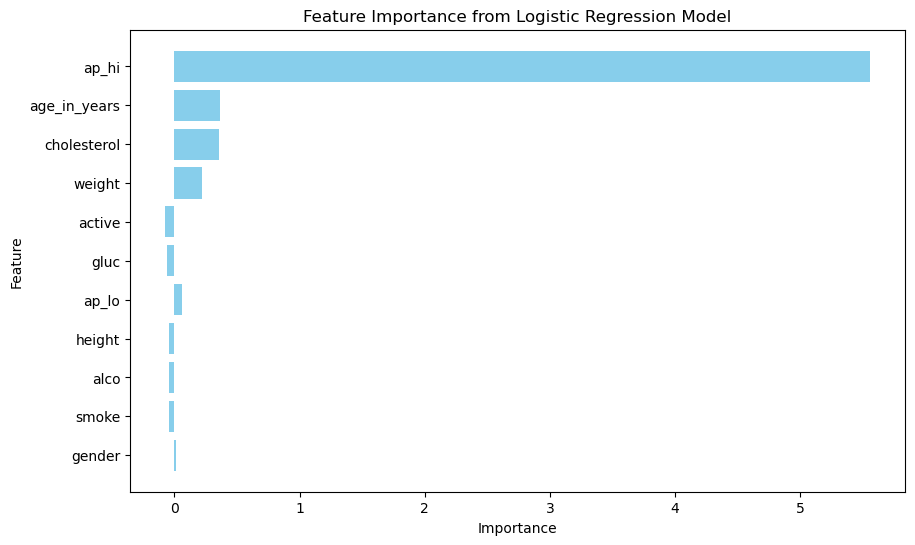

In [112]:
# Plot the feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()